In [1]:
using JLD, Plots
gr()
using HDF5
push!(LOAD_PATH,".")
#include("EntropySymb.jl")
#include("ArbolGrafosTikz.jl")
using ArbolGrafosTikz
using EntropySymb


┌ Info: Precompiling EntropySymb [top-level]
└ @ Base loading.jl:1192


In [4]:
arxname="../JLDFiles/Evocada/control1/LFP_Promedio_est_con5.jld"
datos=load(arxname)
csd=datos["kCSDCorrecta"]
freq=datos["freq"]
retr=datos["retrazo"]
lat=datos["latencia"]
cresp=datos["Canalesrespuesta"]
csatu=datos["CanalesSaturados"];

In [5]:
(h,w,nmax)=size(csd)
epsi=55
  ss=[-1,0,1];

In [6]:
csdsymb=map(x->simboliza(x,epsi), csd);

In [7]:
xs=csdsymb[16,28,:];
ys=[1]

1-element Array{Int64,1}:
 1

Haciendo pruebas, al parecer matar el conjunto de malas con entre 3 y 4 letras es la forma más rapida. Ya despues de eso tiene que revisar palabrerias tan largas que no conviene.

In [9]:
@time (p, v3)=allprobsn(xs, ss, 3)

  0.352799 seconds (855.05 k allocations: 44.925 MiB, 4.09% gc time)


(Dict{Array,Float64}([-1, -1, 0]=>0.00258398,[0, -1, -1]=>0.00258398,[0, 0, 0]=>0.971576,[0, -1, 0]=>0.000861326,[-1, 0, -1]=>0.000861326,[-1, 0, 0]=>0.00258398,[0, 0, -1]=>0.00258398,[-1, -1, -1]=>0.0163652), Set(Any[[1, -1, -1], [-1, 1, 1], [-1, 1, 0], [1, 0, -1], [1, 0, 1], [-1, -1, 1], [1, 1, 1], [1, -1, 0], [0, 1, 0], [0, 1, -1], [-1, 0, 1], [1, 0, 0], [0, 0, 1], [1, -1, 1], [1, 1, -1], [1, 1, 0], [0, -1, 1], [-1, 1, -1], [0, 1, 1]]))

In [10]:
length(v3)

19

In [11]:
@time (ar, ir)=EntropySymb.allprobsn(xs, ss,11, v3);

  1.177668 seconds (11.50 M allocations: 1.210 GiB, 18.59% gc time)


In [12]:
lmax=length(cresp)

359

In [13]:
log(3, nmax)

6.425158561694472

In [41]:
hhsn=Dict{Array{Int, 1}, Array{Float64,1}}()
hhsn2=Dict{Array{Int, 1}, Array{Float64,1}}()
arbol=Dict{Array{Int,1}, Dict{Int, Array}}()
nn=6
@time for c in cresp
        reng=c[1]
        col=c[2]
        xs=csdsymb[reng,col,:]
        hhsn[c]=zeros(nn)
        arbol[c]=Dict{Int, Array}()
     #   arbol[c][0]=[[]]
    for n=1:nn
            v=Set()
        if n<4
            probs, v= EntropySymb.allprobsn(xs, ss,n)
        else
            probs, v2= EntropySymb.allprobsn(xs, ss,n, v)
        end
            buenas=sort(collect(keys(probs)))
            arbol[[reng, col]][n]=buenas
            hhsn[[reng,col]][n]=shanonH_n(probs,n)
            
    end

    
end


 39.654782 seconds (457.97 M allocations: 53.550 GiB, 33.43% gc time)


In [43]:
arbex=arbol[[26,39]]

Dict{Int64,Array} with 6 entries:
  4 => Array[[-1, -1, -1, -1], [-1, -1, -1, 0], [-1, -1, 0, 0], [-1, 0, 0, 0], …
  2 => Array[[-1, -1], [-1, 0], [0, -1], [0, 0], [0, 1], [1, 0], [1, 1]]
  3 => Array[[-1, -1, -1], [-1, -1, 0], [-1, 0, 0], [0, -1, -1], [0, 0, -1], [0…
  5 => Array[[-1, -1, -1, -1, -1], [-1, -1, -1, -1, 0], [-1, -1, -1, 0, 0], [-1…
  6 => Array[[-1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, 0], [-1, -1, -1, -1…
  1 => Array[[-1], [0], [1]]

In [46]:
function structtreefromDict(datos::Dict, niveles::Int)
    ramerio=Subarbol[]
    for n=1:(niveles-1)
    for a in datos[n]
        nodito=Nodo(a)
        jijov=Nodo[]
        arbolillo=Subarbol(nodito,jijov)
        for b in datos[n+1]
            if a==b[1:end-1] # si b pro
                ramita=Nodo(b)
                push!(arbolillo.hijos, ramita)
            end
        end
        push!(ramerio,arbolillo)
        end
    end

    arbolfull=Arbol(ramerio)
    return arbolfull
end

structtreefromDict (generic function with 1 method)

In [47]:
@time arbolfull=structtreefromDict(arbex,6)

  0.043557 seconds (33.84 k allocations: 1.654 MiB)


Arbol(Subarbol[Subarbol(Nodo([-1]), Nodo[Nodo([-1, -1]), Nodo([-1, 0])]), Subarbol(Nodo([0]), Nodo[Nodo([0, -1]), Nodo([0, 0]), Nodo([0, 1])]), Subarbol(Nodo([1]), Nodo[Nodo([1, 0]), Nodo([1, 1])]), Subarbol(Nodo([-1, -1]), Nodo[Nodo([-1, -1, -1]), Nodo([-1, -1, 0])]), Subarbol(Nodo([-1, 0]), Nodo[Nodo([-1, 0, 0])]), Subarbol(Nodo([0, -1]), Nodo[Nodo([0, -1, -1])]), Subarbol(Nodo([0, 0]), Nodo[Nodo([0, 0, -1]), Nodo([0, 0, 0]), Nodo([0, 0, 1])]), Subarbol(Nodo([0, 1]), Nodo[Nodo([0, 1, 1])]), Subarbol(Nodo([1, 0]), Nodo[Nodo([1, 0, 0])]), Subarbol(Nodo([1, 1]), Nodo[Nodo([1, 1, 0]), Nodo([1, 1, 1])])  …  Subarbol(Nodo([0, 0, 0, 0, 0]), Nodo[Nodo([0, 0, 0, 0, 0, -1]), Nodo([0, 0, 0, 0, 0, 0])]), Subarbol(Nodo([0, 0, 0, 0, 1]), Nodo[Nodo([0, 0, 0, 0, 1, 1])]), Subarbol(Nodo([0, 0, 0, 1, 1]), Nodo[Nodo([0, 0, 0, 1, 1, 1])]), Subarbol(Nodo([0, 0, 1, 1, 1]), Nodo[Nodo([0, 0, 1, 1, 1, 1])]), Subarbol(Nodo([0, 1, 1, 1, 1]), Nodo[Nodo([0, 1, 1, 1, 1, 1])]), Subarbol(Nodo([1, 0, 0, -1, -1]), No

In [50]:
grafodelArbol=walk_tree(arbolfull)

LabelledTree({78, 75} directed simple Int64 graph, Any[[-1], [-1, -1], [-1, 0], [0], [0, -1], [0, 0], [0, 1], [1], [1, 0], [1, 1]  …  [0, 0, 0, 0, 1, 1], [0, 0, 0, 1, 1, 1], [0, 0, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1], [1, 0, 0, -1, -1, -1], [1, 1, 0, 0, -1, -1], [1, 1, 1, 0, 0, -1], [1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1]])

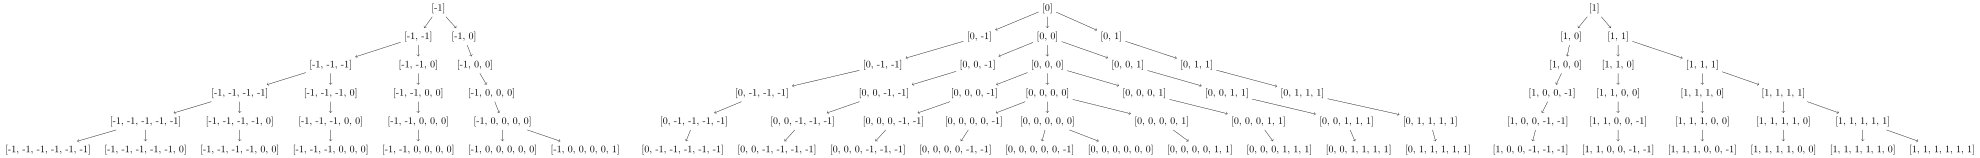

In [51]:
blabla=tikz_representation(grafodelArbol)

In [52]:
using TikzPictures # this is required for saving
TikzPictures.save(SVG("unarbol"), blabla)

┌ Warning: unarbol.svg already exists, overwriting!
└ @ TikzPictures /home/karel/.julia/packages/TikzPictures/x0ZWu/src/TikzPictures.jl:386


In [25]:
pp=plot(key=false)
b=1:nn
for k in keys(hhsn)
    y=hhsn[k]
    scatter!(pp, b, y)
end

In [53]:
freq

17.85550205219098

In [27]:
xxx=[]
yyy=[]
gord1=[]
gord2=[]
for k in keys(hhsn)
    push!(xxx, k[2])
    push!(yyy, k[1])
    push!(gord1, hhsn[k][1])
    push!(gord2, hhsn[k][end])
end
    

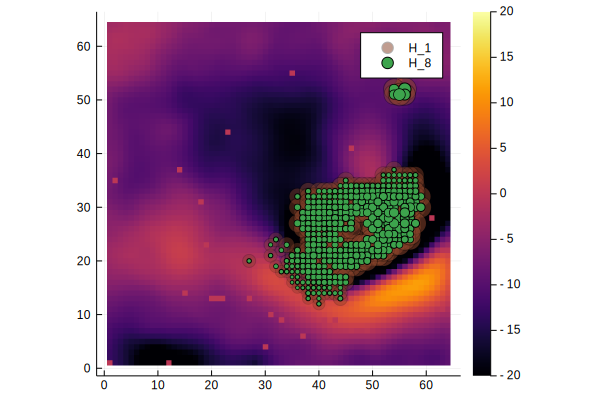

In [29]:
ppp=heatmap(csd[:,:,160], aspect_ratio=1, clims=(-20,20))
f=35
scatter!(xxx, yyy, markersize=gord1.*f, label="H_1", markeralpha=gord1)
scatter!(xxx, yyy, markersize=gord2.*f, label="H_8")


In [ ]:
retr+lat

In [ ]:
using LightGraphs, GraphPlot

In [ ]:
using TikzGraphs

In [ ]:
TikzGraphs.plot(arg)

In [ ]:
arg=Graph(A)

In [ ]:
TikzGraphs.plot(arg)

In [ ]:
rem_vertex!(arg, 5)

In [ ]:
TikzGraphs.plot(arg)

In [ ]:
arbol1=Graph(adja)

In [ ]:
palos=edges(arbol1)

In [ ]:
nodos=collect(vertices(arbol1));


In [ ]:
arbol1podado=Graph()

In [ ]:
for q in palos 
    print(q)
    add_edge!(arbol1podado,q)
end

In [ ]:
palos[1]

In [ ]:
TikzGraphs.plot(arbol1)

In [ ]:
max1=maximum(aar)
max8=maximum(bbr)

In [ ]:
for k in keys(hhsn)
    if hhsn[k][1]==min1
        print(k, " es el min de 1 bloque. ")
    elseif hhsn[k][1]==max1
        print(k, " es el max de 1 bloque. ")
    end
   if hhsn[k][8]==min8
        print(k, " es el min de 8 bloque. ")
    elseif hhsn[k][8]==max8
        print(k, " es el max de 8 bloque. ")
    end
end


In [ ]:
hhsn[:,:,1]==hhsn[:,:,4]

In [ ]:
allprobsn(xs, ss, 3)

In [ ]:
ss=[-1,0,1]
bla=[[q, j] for q in ss, j in ss ]

In [ ]:
?Nodo

In [ ]:
struct fobar
    fo
    bar
end

In [ ]:
a=fobar(1,2)

In [ ]:
problock(xs, [1]) , problock(xs, [0]),problock(xs, [-1])

In [ ]:
heatmap(sumsym, aspect_ratio=1)

In [ ]:
?heatmap

In [ ]:
a=[0,1]
n=[0, 1]
z=[1,1,0]
z2=[1,0,1]

In [ ]:
@time issubvec(a, z2)

In [ ]:
@inbounds

In [ ]:
as=string(a)